In [1]:
!pip install --upgrade tensorflow==2.3.0 # para usarlo con tendorflow lite y micros

     |████████████████████████████████| 320.4 MB 48 kB/s 
     |████████████████████████████████| 20.1 MB 1.6 MB/s 
     |████████████████████████████████| 2.9 MB 54.2 MB/s 
     |████████████████████████████████| 459 kB 65.0 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:
 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from keras_preprocessing.image import ImageDataGenerator

print(f'TensorFlow: {tf.__version__}')

TensorFlow: 2.3.0


In [2]:
PATH = "/content/drive/MyDrive/Colab Notebooks/fruit classification/fruits_color"
APPLES = PATH + "/apples"
ORANGES = PATH + "/oranges"

In [3]:
list_apples = !ls -1 "{APPLES}"
list_oranges = !ls -1 "{ORANGES}"
print( len(list_oranges) + len(list_apples))

360


In [4]:
train = list_oranges + list_apples # junto ambos carpetas de imágenes
len(train)

360

In [5]:
np.random.seed(11) # solo para el tutorial
np.random.shuffle(train) # chocolateo la lista de trainig

In [6]:
train[:10]

['apple171.png',
 'orange74.png',
 'orange76.png',
 'apple62.png',
 'apple95.png',
 'apple93.png',
 'apple136.png',
 'apple129.png',
 'apple180.png',
 'apple172.png']

In [7]:
n = len(train) # 525
tranin_n = round(n * 0.80) # 80% de la lista
print(tranin_n)

288


In [8]:
# particióoj en train y val
train_urls = train[:tranin_n] # hasta el indice 420
val_urls = train[tranin_n:n] # desde el indice 430 hasta el 525 
print(len(train), len(train_urls), len(val_urls))

360 288 72


In [9]:
# genero las etiquetas para el entrenamiento
target =[]
naranjas = 0
for i in train_urls:
  if i[0] == "o":
    target.append(0.)
    naranjas += 1
  else:
   target.append(1.)

print("Total: " + str(len(target)) +"\nNaranjas: "  + str(naranjas) + "\nManzanas: " + str(len(target) -naranjas))

Total: 288
Naranjas: 140
Manzanas: 148


In [10]:
# genero las etiqutas para valitación
target_val =[]
naranjas = 0
for i in val_urls:
  if i[0] == "o":
    target_val.append(0.)
    naranjas += 1
  else:
   target_val.append(1.)

print("Total: " + str(len(target_val)) +"\nNaranjas: "  + str(naranjas) + "\nManzanas: " + str(len(target_val) -naranjas))

Total: 72
Naranjas: 40
Manzanas: 32


In [11]:
target_val[:10]

[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0]

In [14]:
train_path = [] # genero la lista con las rutas
for i in range(len(train_urls)):
  if train_urls[i][0] == "o":
    train_path.append( ORANGES + "/" + train_urls[i])
  else:
    train_path.append( APPLES + "/" + train_urls[i])
train_path[:10]

['/content/drive/MyDrive/Colab Notebooks/fruit classification/fruits_color/apples/apple171.png',
 '/content/drive/MyDrive/Colab Notebooks/fruit classification/fruits_color/oranges/orange74.png',
 '/content/drive/MyDrive/Colab Notebooks/fruit classification/fruits_color/oranges/orange76.png',
 '/content/drive/MyDrive/Colab Notebooks/fruit classification/fruits_color/apples/apple62.png',
 '/content/drive/MyDrive/Colab Notebooks/fruit classification/fruits_color/apples/apple95.png',
 '/content/drive/MyDrive/Colab Notebooks/fruit classification/fruits_color/apples/apple93.png',
 '/content/drive/MyDrive/Colab Notebooks/fruit classification/fruits_color/apples/apple136.png',
 '/content/drive/MyDrive/Colab Notebooks/fruit classification/fruits_color/apples/apple129.png',
 '/content/drive/MyDrive/Colab Notebooks/fruit classification/fruits_color/apples/apple180.png',
 '/content/drive/MyDrive/Colab Notebooks/fruit classification/fruits_color/apples/apple172.png']

In [13]:
val_path = []
for i in range(len(val_urls)):
  if val_urls[i][0] == "o":
    val_path.append( ORANGES + "/" + val_urls[i])
  else:
    val_path.append( APPLES + "/" + val_urls[i])
val_path[:10]

['/content/drive/MyDrive/Colab Notebooks/fruit classification/fruits_color/oranges/orange177.png',
 '/content/drive/MyDrive/Colab Notebooks/fruit classification/fruits_color/apples/apple140.png',
 '/content/drive/MyDrive/Colab Notebooks/fruit classification/fruits_color/oranges/orange118.png',
 '/content/drive/MyDrive/Colab Notebooks/fruit classification/fruits_color/oranges/orange166.png',
 '/content/drive/MyDrive/Colab Notebooks/fruit classification/fruits_color/oranges/orange169.png',
 '/content/drive/MyDrive/Colab Notebooks/fruit classification/fruits_color/apples/apple177.png',
 '/content/drive/MyDrive/Colab Notebooks/fruit classification/fruits_color/oranges/orange137.png',
 '/content/drive/MyDrive/Colab Notebooks/fruit classification/fruits_color/apples/apple4.png',
 '/content/drive/MyDrive/Colab Notebooks/fruit classification/fruits_color/oranges/orange37.png',
 '/content/drive/MyDrive/Colab Notebooks/fruit classification/fruits_color/apples/apple68.png']

In [15]:
print( len(target) ,  len(train_path)) # verifico si las cantidades coinciden

288 288


Nueva tecnica de cargado de imágenes:

In [16]:
IMG_WIDTH = 60
IMG_HEIGHT = 60
BATCH_SIZE = 16

rotate = tf.keras.layers.experimental.preprocessing.RandomRotation(0.3)

# rescalar las imáganes
def resize(imagen, trg):
  img = tf.image.resize(imagen, [IMG_WIDTH, IMG_HEIGHT], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  return img, trg

def normalize(imegen, trg):
  img  = imegen / 255   
  return img, trg 


def random_jitter( inimg, trg ):
  inimg = tf.image.adjust_saturation(inimg, 0.5)
  inimg = tf.image.adjust_contrast(inimg, 1.)

  inimg = tf.image.random_flip_left_right(inimg)
  inimg = tf.image.random_saturation(inimg, .4, 2.)

  image = tf.image.resize(inimg, [66, 66], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  image = tf.image.random_crop( image, size=[IMG_HEIGHT, IMG_WIDTH, 3])
        
  return image, trg 

def load_img(imagen, trg, augment=False):
  img = tf.io.read_file(imagen)
  img = tf.image.decode_png(img, channels=0)
  img = tf.cast(img, tf.float32)
  img, target = resize(img, trg)
  img, target = normalize(img, trg)
  
  if augment:
    img, trg  = random_jitter(img, trg)
        
  return img, trg

def load_train_images(filename, label):
  return load_img(filename ,label, True)

def load_val_images(filename, label):
  return load_img(filename ,label, False)

In [17]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_path, target))
train_dataset = train_dataset.map(load_train_images)
train_dataset = train_dataset.shuffle(2048)
train_dataset = train_dataset.batch(BATCH_SIZE)

val_dataset = tf.data.Dataset.from_tensor_slices((val_path, target_val))
val_dataset = val_dataset.map(load_val_images)
val_dataset = val_dataset.shuffle(2048)
val_dataset = val_dataset.batch(BATCH_SIZE)

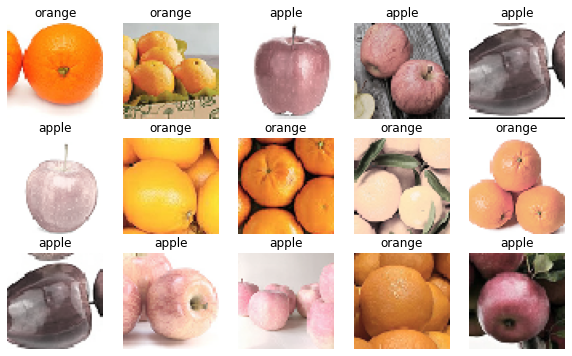

In [18]:
import matplotlib.pyplot as plt
class_names = ["orange", "apple"]
r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        for imgs, labels in train_dataset.take(1):
            img = imgs.numpy() #/ 255
            ima = np.reshape(img[0], (1, IMG_WIDTH, IMG_HEIGHT,3))
            plt.imshow(ima[0])
            plt.title(class_names[int(labels[0])])
            plt.axis(False)
plt.show()

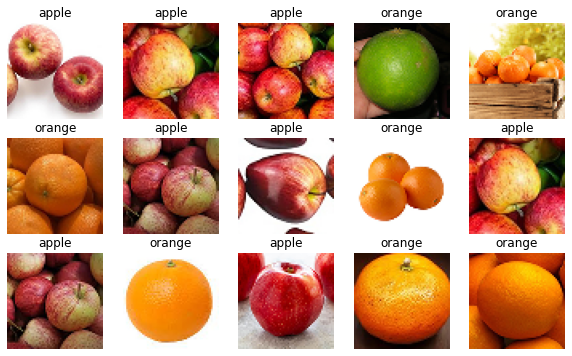

In [19]:
r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        for imgs, labels in val_dataset.take(1):
            img = imgs.numpy() #/ 255
            #print(img)
            ima = np.reshape(img[0], (1, IMG_WIDTH, IMG_HEIGHT,3))
            plt.imshow(ima[0])
            plt.title(class_names[int(labels[0])])
            plt.axis(False)
plt.show()

In [20]:
train_dataset, val_dataset

(<BatchDataset shapes: ((None, 60, 60, 3), (None,)), types: (tf.float32, tf.float32)>,
 <BatchDataset shapes: ((None, 60, 60, None), (None,)), types: (tf.float32, tf.float32)>)

In [217]:
num_classes = len(class_names)

model = tf.keras.Sequential()

model.add(layers.Conv2D(4, 3, activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT,3))) 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(6, activation='relu')) 
model.add(tf.keras.layers.Dense(num_classes,activation='softmax'))

In [218]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [219]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 58, 58, 4)         112       
_________________________________________________________________
flatten_28 (Flatten)         (None, 13456)             0         
_________________________________________________________________
dense_56 (Dense)             (None, 6)                 80742     
_________________________________________________________________
dense_57 (Dense)             (None, 2)                 14        
Total params: 80,868
Trainable params: 80,868
Non-trainable params: 0
_________________________________________________________________


In [220]:
epochs=15
history = model.fit(
  train_dataset,
  validation_data= val_dataset,
  epochs=epochs
)

Epoch 1/15
18/18 [==============================] - 1s 32ms/step - loss: 0.6560 - accuracy: 0.6215 - val_loss: 0.6905 - val_accuracy: 0.6111
Epoch 2/15
18/18 [==============================] - 0s 28ms/step - loss: 0.6649 - accuracy: 0.6181 - val_loss: 0.5953 - val_accuracy: 0.6944
Epoch 3/15
18/18 [==============================] - 0s 28ms/step - loss: 0.5826 - accuracy: 0.7153 - val_loss: 0.5641 - val_accuracy: 0.7222
Epoch 4/15
18/18 [==============================] - 1s 29ms/step - loss: 0.5353 - accuracy: 0.7569 - val_loss: 0.5527 - val_accuracy: 0.6944
Epoch 5/15
18/18 [==============================] - 0s 27ms/step - loss: 0.5279 - accuracy: 0.7674 - val_loss: 0.5471 - val_accuracy: 0.7083
Epoch 6/15
18/18 [==============================] - 1s 28ms/step - loss: 0.5030 - accuracy: 0.8090 - val_loss: 0.4880 - val_accuracy: 0.8194
Epoch 7/15
18/18 [==============================] - 0s 28ms/step - loss: 0.4893 - accuracy: 0.8333 - val_loss: 0.4812 - val_accuracy: 0.8194
Epoch 8/15
18

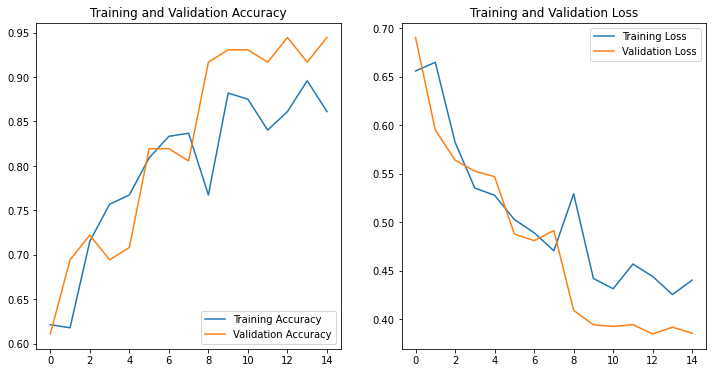

In [221]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Este modelo es para test:

In [222]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("fruits_model.tflite", 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpl5gv9sgy/assets


INFO:tensorflow:Assets written to: /tmp/tmpl5gv9sgy/assets


325668

 Podemos ver los modelos *.tflite en:
 https://netron.app/





In [223]:
def decode_img(filename):
    img = tf.io.read_file(filename)
    img = tf.image.decode_png(img)
    img = tf.cast(img, tf.float32)
    img  = (img / 255)
    img = tf.image.resize(img, [60, 60])
    return img

def load_ds_gen(list_files):
    ds = tf.data.Dataset.from_tensor_slices((list_files))
    ds = ds.map(decode_img)
    ds = ds.batch(1)
    return ds

In [224]:
fruits_ds = load_ds_gen(train_path)
fruits_ds

<BatchDataset shapes: (None, 60, 60, None), types: tf.float32>

In [225]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

converter.inference_input_type = tf.int8  # or tf.uint8
converter.inference_output_type = tf.int8  # or tf.uint8

In [226]:
def representative_data_gen():
  for input_value in fruits_ds.take(300):
    yield [input_value]
converter.representative_dataset = representative_data_gen

In [227]:
fruits_16x8_model = converter.convert()
open("fruits_16x8_model.tflite", 'wb').write(fruits_16x8_model)

INFO:tensorflow:Assets written to: /tmp/tmppimhuow_/assets


INFO:tensorflow:Assets written to: /tmp/tmppimhuow_/assets


84000

In [228]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n\n'

  # Add array length at top of file
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # Declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str


In [229]:
c_model_name = 'fruits' 
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
  file.write(hex_to_c_array(fruits_16x8_model, c_model_name))

In [230]:
# Print the source file
!cat fruits.h

#ifndef FRUITS_H
#define FRUITS_H


unsigned int fruits_len = 84000;
unsigned char fruits[] = {
 0x24, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x12, 0x00, 0x1c, 0x00, 0x04, 0x00,
  0x08, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x14, 0x00, 0x00, 0x00, 0x18, 0x00,
  0x12, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 0x98, 0x47, 0x01, 0x00,
  0xc8, 0x3d, 0x01, 0x00, 0xb0, 0x3d, 0x01, 0x00, 0x3c, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x00, 0x00,
  0x08, 0x00, 0x0c, 0x00, 0x04, 0x00, 0x08, 0x00, 0x08, 0x00, 0x00, 0x00,
  0x08, 0x00, 0x00, 0x00, 0x0e, 0x00, 0x00, 0x00, 0x13, 0x00, 0x00, 0x00,
  0x6d, 0x69, 0x6e, 0x5f, 0x72, 0x75, 0x6e, 0x74, 0x69, 0x6d, 0x65, 0x5f,
  0x76, 0x65, 0x72, 0x73, 0x69, 0x6f, 0x6e, 0x00, 0x0f, 0x00, 0x00, 0x00,
  0x64, 0x3d, 0x01, 0x00, 0x50, 0x3d, 0x01, 0x00, 0x24, 0x3d, 0x01, 0x00,
  0xf0, 0x3c, 0x01, 0x00, 0xcc, 0x3c, 0x01, 0x00, 0xa8, 0x3c, 0x01, 0x00,
  0x34, 0x01, 0x0

In [231]:
# Instantiate an interpreter for each model
exercice_model = tf.lite.Interpreter('fruits_16x8_model.tflite')

# Allocate memory for each model
exercice_model.allocate_tensors()

# Get the input and output tensors so we can feed in values and get the results
input_details = exercice_model.get_input_details()
output_details = exercice_model.get_output_details()

In [232]:
input_details

[{'dtype': numpy.int8,
  'index': 0,
  'name': 'conv2d_35_input',
  'quantization': (0.003921568859368563, -128),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([0.00392157], dtype=float32),
   'zero_points': array([-128], dtype=int32)},
  'shape': array([ 1, 60, 60,  3], dtype=int32),
  'shape_signature': array([-1, 60, 60,  3], dtype=int32),
  'sparsity_parameters': {}}]

In [233]:
output_details

[{'dtype': numpy.int8,
  'index': 12,
  'name': 'Identity',
  'quantization': (0.00390625, -128),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([0.00390625], dtype=float32),
   'zero_points': array([-128], dtype=int32)},
  'shape': array([1, 2], dtype=int32),
  'shape_signature': array([-1,  2], dtype=int32),
  'sparsity_parameters': {}}]

In [234]:
#class_names = ['orange', 'apple']
scales_i = input_details[0]["quantization"][0]
zero_points_i = input_details[0]["quantization"][1]
scales_o = output_details[0]["quantization"][0]
zero_points_o = output_details[0]["quantization"][1]

def do_inference(name):
  total_test = 30
  n = 0
  for i in range(total_test):
    file = PATH + "/" + name + str(i+1)+".png"
    test = tf.io.read_file(file)
    test = tf.image.decode_png(test, channels=3)
    test = tf.image.resize(test, [60, 60])
    test = np.reshape(test, (60, 60,3))
    test = test / 255
    test = (test/scales_i) + (zero_points_i)
    test = test.astype(input_details[0]["dtype"])
    input_shape = input_details[0]['shape']
    input_data = test.reshape((1,60,60,3))
    input_data = tf.cast(input_data, tf.int8)
    exercice_model.set_tensor(input_details[0]['index'], input_data)
    exercice_model.invoke()
    output_data = exercice_model.get_tensor(output_details[0]['index'])
    if (class_names[np.argmax(output_data - scales_o * zero_points_o)] == name.split("/")[1]): # cuanta las coincidencias
      n = n +1
  print('{} : {:.2f} %'.format(name.split("/")[0], n/total_test*100))

do_inference("apples/apple")
do_inference("oranges/orange")

apples : 86.67 %
oranges : 93.33 %
